In [1]:
import pandas as pd
import sys

from sklearn.preprocessing import StandardScaler
from sklearn.decomposition import PCA

import matplotlib.pyplot as plt
import seaborn as sns

import numpy as np
np.random.seed(0)


sys.path.append("..")

from functions import (df_security_code, 
        print_shape
)

In [2]:
data = pd.read_csv('../data/a_price_financial_fill.csv', parse_dates=['Date'],  index_col=[0])
df = df_security_code(data)
del data

In [3]:
print_shape(df, False)

 Shape:
 ----------------------------------------
 Observations:   1.2K
 Features:       53
 Feature Date:    datetime64[ns]
----------------------------------------
Index(['RowId', 'Date', 'SecuritiesCode', 'AdjustmentFactor',
       'ExpectedDividend', 'SupervisionFlag', 'Target', 'ad_Open', 'ad_High',
       'ad_Low', 'ad_Close', 'ad_Volume', 'ad_Target', 'ad_Close_lag1',
       'ad_Close_sma10', 'ad_Open_lag1', 'ad_Open_sma10', 'ad_High_lag1',
       'ad_High_sma10', 'ad_Low_lag1', 'ad_Low_sma10', 'ad_Volume_lag1',
       'ad_Volume_sma10', 'RSI', 'Return', 'logreturn', 'Log_Return', 'MACD',
       'MACD_h', 'MACD_s', 'Year', 'week', 'Volatility_week', 'macd', 'macd_h',
       'macd_s', 'Date_f_', 'Day', 'Month', 'Year_f_', 'SecuritiesCode_f_',
       'Profit', 'NetSales', 'margin', 'profit_ttm', 'rev_ttm',
       'win_quarter_growth', 'rev_quarter_growth', 'win_yoy_growth',
       'rev_yoy_growth', 'win_ttm_growth', 'rev_ttm_growth', 'margin_growth'],
      dtype='object')
-------

In [4]:
feat_not_to_scale = ['RowId', 'Date', 'SecuritiesCode', 'Target','Log_Return', 'MACD',
       'MACD_h', 'MACD_s', 'Year', 'week','Date_f_', 'Day', 'Month', 'Year_f_', 'SecuritiesCode_f_' ]

feat_to_scale = [x for x in df.columns if x not in feat_not_to_scale]
len(feat_to_scale)

38

In [5]:
# remove nan values
df.sort_values('Date')
df = df[feat_to_scale].dropna()

In [6]:
scaler = StandardScaler()
df_scaled = scaler.fit_transform(df)
df_scaled = pd.DataFrame(df_scaled)
df_scaled.columns = feat_to_scale
df_scaled.head(2)



,AdjustmentFactor,ExpectedDividend,SupervisionFlag,ad_Open,ad_High,ad_Low,ad_Close,ad_Volume,ad_Target,ad_Close_lag1,...,margin,profit_ttm,rev_ttm,win_quarter_growth,rev_quarter_growth,win_yoy_growth,rev_yoy_growth,win_ttm_growth,rev_ttm_growth,margin_growth
0,0.032756,-0.98917,0.0,-0.283429,-0.257602,-0.323818,-0.226360,2.422444,1.610590,-0.025965,...,0.767896,-0.287721,-0.737138,0.530145,0.392538,-0.079407,-0.093561,0.75859,0.169635,0.571882
1,0.032756,-0.98917,0.0,0.060107,0.101243,-0.115595,-0.147304,2.641224,-0.806377,-0.224344,...,0.767896,-0.287721,-0.737138,0.530145,0.392538,-0.079407,-0.093561,0.75859,0.169635,0.571882


In [7]:
# PCA

pca = PCA(n_components=None)
df_scaled_pca = pca.fit(df_scaled)

In [17]:
pd.DataFrame(df_scaled_pca.components_).shape

(38, 38)

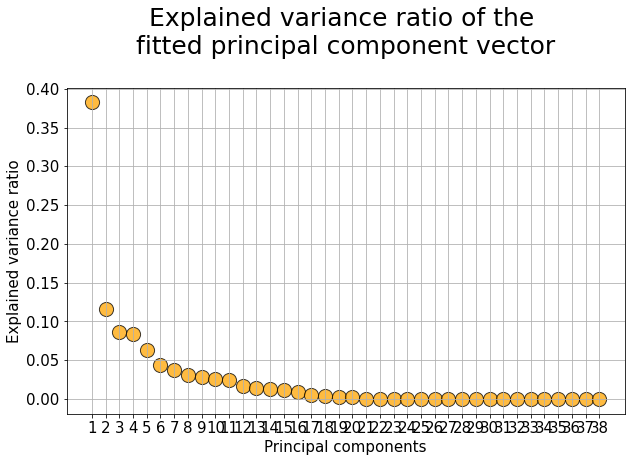

In [8]:
plt.figure(figsize=(10,6))
plt.scatter(x=[i+1 for i in range(len(df_scaled_pca.explained_variance_ratio_))],
            y=df_scaled_pca.explained_variance_ratio_,
            s=200, alpha=0.75,c='orange',edgecolor='k')
plt.grid(True)
plt.title("Explained variance ratio of the \nfitted principal component vector\n",fontsize=25)
plt.xlabel("Principal components",fontsize=15)
plt.xticks([i+1 for i in range(len(df_scaled_pca.explained_variance_ratio_))],fontsize=15)
plt.yticks(fontsize=15)
plt.ylabel("Explained variance ratio",fontsize=15)
plt.show()

In [9]:
# number of components
n_pcs= pca.components_.shape[0]

# get the index of the most important feature on EACH component
# LIST COMPREHENSION HERE
most_important = [np.abs(pca.components_[i]).argmax() for i in range(n_pcs)]

initial_feature_names = df.columns
# get the names
most_important_names = [initial_feature_names[most_important[i]] for i in range(n_pcs)]

# LIST COMPREHENSION HERE AGAIN
dic = {'PC{}'.format(i): most_important_names[i] for i in range(n_pcs)}

# build the dataframe
df = pd.DataFrame(dic.items())
df

,0,1
0,PC0,ad_Low_lag1
1,PC1,win_ttm_growth
2,PC2,RSI
3,PC3,win_quarter_growth
4,PC4,Return
5,PC5,logreturn
6,PC6,Profit
7,PC7,ExpectedDividend
8,PC8,AdjustmentFactor
9,PC9,AdjustmentFactor


In [10]:
df_arima = df[['ad_Close', 'Date']]
train_test_split_ratio = int(len(df_arima)*0.95)
train_data, test_data = df_arima[:train_test_split_ratio], df_arima[train_test_split_ratio:]

KeyError: "None of [Index(['ad_Close', 'Date'], dtype='object')] are in the [columns]"

In [ ]:
from sklearn.pipeline import make_pipeline

scaler = StandardScaler()

def scale_pca(df, n=None):   
    feat_not_to_scale = ['RowId', 'Date', 'SecuritiesCode', 'Target','Log_Return', 'MACD',
       'MACD_h', 'MACD_s', 'Year', 'week','Date_f_', 'Day', 'Month', 'Year_f_', 'SecuritiesCode_f_' ]

    feat_to_scale = [x for x in df.columns if x not in feat_not_to_scale]

    df.dropna(inplace=True)
    df_to_scale= df[feat_to_scale]

    # scaling 
    scaler = StandardScaler()
    df_scaled = scaler.fit_transform(df_to_scale)
    df_scaled = pd.DataFrame(df_scaled)
    df_scaled.columns = feat_to_scale

    # PCA

    pca = PCA(n_components=n)
    df_scaled_pca = pca.fit(df_scaled)

    print(type(pd.DataFrame(df_scaled_pca)))

    #df_new = pd.merge(df['RowId', 'Date', 'SecuritiesCode', 'Year', 'week', 'Month'], df_scaled_pca)
    rows = ['RowId', 'Date', 'SecuritiesCode', 'Year', 'week', 'Month']
    for r in rows:
        df_scaled_pca[r] = df[r]
    
    return df_scaled_pca



In [ ]:
df_scale_pca = scale_pca(df)